In [1]:
# Common import
import pandas as pd
import numpy as np

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


In [2]:
# artwork = pd.read_csv('artwork.csv')
# artist = pd.read_csv('artist_data.csv')

# read in the data manually by running the following code

artwork = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2021/2021-01-12/artwork.csv')
artists = pd.read_csv("https://github.com/tategallery/collection/raw/master/artist_data.csv")

# Data Exploratory Analysis for artwork

In [3]:
# Renaming columns
artwork = artwork.rename(columns={'id':'Id', 'accession_number':'Accession_number', 'artist':'Artist', 'artistRole':'ArtistRole', 'artistId':'ArtistId', 'title':'Title',
       'dateText':'DataText', 'medium':'Medium', 'creditLine':'CreditLine', 'year':'Year', 'acquisitionYear':'AcquisitionYear',
       'dimensions':'Dimensions', 'width':'Width', 'height':'Height', 'depth':'Depth', 'units':'Units', 'inscription':'Inscription',
       'thumbnailCopyright':'ThumbnailCopyright', 'thumbnailUrl':'ThumbnailUrl', 'url':'Url'})

In [4]:
artwork = artwork[artwork['Artist'] != 'Turner, Joseph Mallord William']
artwork

Id Accession_number              Artist ArtistRole  ArtistId  \
0        1035           A00001       Blake, Robert     artist        38   
1        1036           A00002       Blake, Robert     artist        38   
2        1037           A00003       Blake, Robert     artist        38   
3        1038           A00004       Blake, Robert     artist        38   
4        1039           A00005      Blake, William     artist        39   
...       ...              ...                 ...        ...       ...   
69196  122960           T13865  P-Orridge, Genesis     artist     16646   
69197  122961           T13866  P-Orridge, Genesis     artist     16646   
69198  121181           T13867        Hatoum, Mona     artist      2365   
69199  112306           T13868       Creed, Martin     artist      2760   
69200  127035           T13869   Brunias, Agostino     artist      3824   

                                                   Title  \
0      A Figure Bowing before a Seated Old Man with h...   
1      Two Drawings of Frightened Figures, Probably f...   
2      The Preaching of Warning. Verso: An Old Man En...   
3         Six Drawings of Figures with Outstretched Arms   
4      The Circle of the Lustful: Francesca da Rimini...   
...                                                  ...   
69196                        Larvae (from Tampax Romana)   
69197                   Living Womb (from Tampax Romana)   
69198                                      Present Tense   
69199          Work No. 227: The lights going on and off   
69200                   Dancing Scene in the West Indies   

                     DataText  \
0              date not known   
1              date not known   
2                     ?c.1785   
3              date not known   
4      1826–7, reprinted 1892   
...                       ...   
69196                    1975   
69197                    1976   
69198                    1996   
69199                    2000   
69200                 1764–96   

                                                  Medium  \
0      Watercolour, ink, chalk and graphite on paper....   
1                                      Graphite on paper   
2            Graphite on paper. Verso: graphite on paper   
3                                      Graphite on paper   
4                                Line engraving on paper   
...                                                  ...   
69196   Perspex, Wood, hairpiece, tampon and human blood   
69197  Wood, Perspex, plastic, photograph on paper, t...   
69198                               Soap and glass beads   
69199                                   Gallery lighting   
69200                                Oil paint on canvas   

                                              CreditLine    Year  \
0                    Presented by Mrs John Richmond 1922     NaN   
1                    Presented by Mrs John Richmond 1922     NaN   
2                    Presented by Mrs John Richmond 1922  1785.0   
3                    Presented by Mrs John Richmond 1922     NaN   
4      Purchased with the assistance of a special gra...  1826.0   
...                                                  ...     ...   
69196                 Transferred from Tate Archive 2012  1975.0   
69197                 Transferred from Tate Archive 2012  1976.0   
69198                     Presented by Tate Members 2013  1996.0   
69199  Purchased with funds provided by Tate Members,...  2000.0   
69200  Purchased with assistance from Tate Patrons an...  1764.0   

       AcquisitionYear                           Dimensions  Width  Height  \
0               1922.0                support: 394 x 419 mm  394.0   419.0   
1               1922.0                support: 311 x 213 mm  311.0   213.0   
2               1922.0                support: 343 x 467 mm  343.0   467.0   
3               1922.0                support: 318 x 394 mm  318.0   394.0   
4               1919.0                  image: 243 x 335 mm  243

#### Exploring what kinds of medium were most widely used to paint.

In [5]:
medium_counts = artwork.groupby(['Medium']).agg(counts=('Medium', 'size'))
medium_counts = medium_counts.sort_values('counts',ascending=False).reset_index()

medium_counts['Medium'] = medium_counts['Medium'].str.replace(r' on paper','')


medium_counts = medium_counts.head(20)
medium_counts

Medium  counts
0                Oil paint on canvas    3139
1                        Screenprint    2984
2                         Lithograph    2720
3                            Etching    1693
4                           Graphite    1462
5                                Ink     813
6   Photograph, gelatin silver print     751
7           Graphite and watercolour     606
8                     Intaglio print     603
9                        Watercolour     552
10                             Print     430
11                          Aquatint     409
12              Etching and aquatint     393
13                            Bronze     384
14               Ink and watercolour     384
15                    Wood engraving     345
16                      Copper plate     318
17                     Digital print     265
18     Graphite, ink and watercolour     244
19                  Ink and graphite     243

### Plotting using seaborn

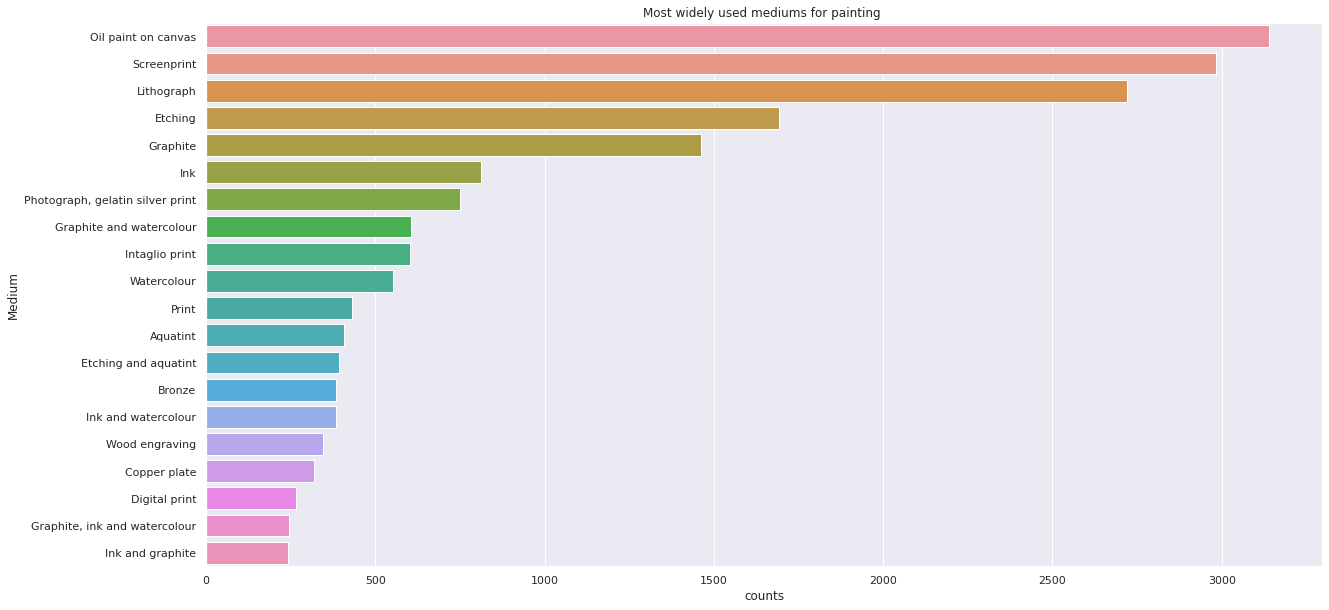

In [6]:
import seaborn as sns
fig = plt.figure(figsize=(20, 10))
sns.set_theme()
sns.barplot(x='counts',y='Medium',data=medium_counts).set_title("Most widely used mediums for painting ");


#### Exploring Top 10 artists(not including Turner) and  Exploring which artist used what kind of mediums.

In [7]:
artist_medium = artwork.groupby(['Artist', 'Medium']).agg(Counts=('Medium', 'size'))
artist_medium = artist_medium.sort_values('Counts',ascending=False).reset_index()

# To Get top 16 artist
#artist_medium = artist_medium.groupby(['Artist']).sum().sort_values('Counts', ascending=False).head(16).reset_index()

# To group all groups that are to small into one 'Other' group
artist_medium.loc[~ artist_medium['Artist'].isin(['Jones, George', 'Moore, Henry, OM, CH', 'Daniell, William',
       'Beuys, Joseph', 'British (?) School', 'Paolozzi, Sir Eduardo',
       'Flaxman, John', 'Phillips, Esq Tom', 'Warhol, Andy',
       'Constable, John']), 'Artist'] = 'Other'


artist_medium = artist_medium.loc[artist_medium['Artist']!='Other']

# To Get Top 8 Medium
#artist_medium = artist_medium.groupby(['Medium']).sum().sort_values('Counts',ascending=False).reset_index()

artist_medium.loc[~ artist_medium['Medium'].isin(['Screenprint on paper', 'Lithograph on paper', 'Print on paper',
       'Ink on paper', 'Etching on paper', 'Aquatint on paper',
       'Copper plate', 'Graphite on paper']), 'Medium'] = 'Other'

artist_medium = artist_medium.groupby(['Artist', 'Medium']).sum().sort_values('Counts', ascending=False).reset_index()

#artist_medium['Medium'] = artist_medium['Medium'].str.replace(r' on paper','')
artist_medium

Artist                Medium  Counts
0           Jones, George                 Other     662
1           Beuys, Joseph        Print on paper     420
2           Jones, George          Ink on paper     352
3        Daniell, William          Copper plate     306
4        Daniell, William     Aquatint on paper     306
5    Moore, Henry, OM, CH   Lithograph on paper     304
6         Constable, John                 Other     234
7    Moore, Henry, OM, CH                 Other     229
8   Paolozzi, Sir Eduardo  Screenprint on paper     215
9      British (?) School                 Other     212
10          Beuys, Joseph                 Other     140
11          Flaxman, John                 Other     129
12  Paolozzi, Sir Eduardo                 Other     120
13          Flaxman, John      Etching on paper     112
14      Phillips, Esq Tom  Screenprint on paper     104
15           Warhol, Andy                 Other     100
16           Warhol, Andy  Screenprint on paper      88
17      Phillips, Esq Tom   Lithograph on paper      86
18     British (?) School     Graphite on paper      84
19   Moore, Henry, OM, CH      Etching on paper      83
20           Warhol, Andy   Lithograph on paper      70
21     British (?) School      Etching on paper      57
22      Phillips, Esq Tom                 Other      49
23  Paolozzi, Sir Eduardo      Etching on paper      47
24          Flaxman, John     Graphite on paper      43
25      Phillips, Esq Tom      Etching on paper      35
26          Jones, George     Graphite on paper      32
27     British (?) School   Lithograph on paper      23
28        Constable, John     Graphite on paper      14
29          Beuys, Joseph     Graphite on paper      12
30     British (?) School          Ink on paper      11
31           Warhol, Andy          Ink on paper      10
32           Warhol, Andy     Graphite on paper       4
33          Flaxman, John          Ink on paper       3
34          Beuys, Joseph  Screenprint on paper       3
35  Paolozzi, Sir Eduardo   Lithograph on paper       2
36          Beuys, Joseph   Lithograph on paper       2
37   Moore, Henry, OM, CH     Graphite on paper       1
38          Beuys, Joseph          Ink on paper       1
39  Paolozzi, Sir Eduardo          Ink on paper       1
40        Constable, John          Ink on paper       1
41     British (?) School     Aquatint on paper       1

In [8]:
#!pip install plotly


## Bar Chart for Varieties Of Medium Used by Top 10 Artists

In [9]:

import plotly.express as px


# If we want to custiomize the bar colors we just need to put parameter ==> color_discrete_sequence = ['darkgrey', 'pink', 'orangered', 'forestgreen', 'darkorange', 'wheat', 'darkviolet', "goldenrod", "magenta"]
top_artist_fig = px.bar(artist_medium, x='Counts', y='Artist', color='Medium',title="Varieties of Medium used by Top 10 Artists")

# Update layout to sort bars in ascending Order
# If we want to make the plot transparent,  we just need to put parameter (plot_bgcolor='rgba(0,0,0,0)'

top_artist_fig.update_layout(barmode='stack', 
                  yaxis={'categoryorder':'total ascending'},
                  title_font_family="Times New Roman",
                  title_font_color="Black",
                  title_font_size = 30,
                  paper_bgcolor='#FFFDE7',)
                  
                  
top_artist_fig.update_xaxes(title_font=dict(size=20, family='Times New Roman', color='crimson'))
top_artist_fig.update_xaxes(tickfont_family="Arial Black")
top_artist_fig.update_yaxes(title_font=dict(size=20, family='Times New Roman', color='crimson'))
top_artist_fig.update_yaxes(tickfont_family="Arial Black")

top_artist_fig.show()

In [10]:
# fig, ax = plt.subplots()
# sns.barplot(data=artist_medium,
#             ax=ax,
#             x= 'Artist',
#             y='Counts',
#             hue='Medium',
#             palette = 'hls' 
#                 ).set_xticklabels(labels= artist_medium['Artist'],rotation=90 , ha='center');

# Function to change width of bar chart
# def change_width(ax, new_value) :
#     for patch in ax.patches :
#         current_width = patch.get_width()
#         diff = current_width - new_value

#         # we change the bar width
#         patch.set_width(new_value)

#         # we recenter the bar
#         patch.set_x(patch.get_x() + diff * .5)
        
# change_width(ax, .15)


#### Exploring Medium over time

In [11]:
medium_time =  artwork[artwork['Year'] >= 1750]
medium_time = medium_time.groupby(['Year', 'Medium']).agg(Counts=('Year', 'size'))

 
medium_time = medium_time.sort_values('Counts',ascending=False).reset_index()

# To get top 8 medium 
# medium_time = medium_time.groupby(['Medium']).sum().sort_values('Counts',ascending=False).reset_index()

medium_time.loc[~ medium_time['Medium'].isin(['Oil paint on canvas', 'Screenprint on paper',
       'Lithograph on paper', 'Etching on paper',
       'Photograph, gelatin silver print on paper', 'Graphite on paper',
       'Intaglio print on paper', 'Aquatint on paper']), 'Medium'] = 'Other'

medium_time['Decade'] =  round(medium_time['Year'],-1)
medium_time = medium_time.drop('Year', axis= 'columns' )
medium_time = medium_time[['Decade','Medium', 'Counts']]
medium_time = medium_time.groupby(['Decade', 'Medium']).sum().reset_index()
medium_time['Percentage'] =( medium_time['Counts'] / sum(medium_time['Counts']) ) 
medium_time = medium_time.sort_values('Percentage', ascending=False)


medium_time


Decade                                     Medium  Counts  Percentage
130  1970.0                       Screenprint on paper    1696    0.069216
137  1980.0                                      Other    1588    0.064808
154  2000.0                                      Other    1586    0.064727
128  1970.0                                      Other    1492    0.060891
146  1990.0                                      Other    1185    0.048361
..      ...                                        ...     ...         ...
65   1890.0                    Intaglio print on paper       1    0.000041
75   1900.0  Photograph, gelatin silver print on paper       1    0.000041
103  1940.0                       Screenprint on paper       1    0.000041
104  1950.0                          Aquatint on paper       1    0.000041
0    1750.0                          Graphite on paper       1    0.000041

[164 rows x 4 columns]

### Ploting Area chart with Plotly.

In [12]:
import plotly.graph_objects as go

medium_over_time_fig = px.area(medium_time, x= "Decade", y="Percentage", color="Medium", title = "Percentage of Medium Over Time")

# Layout setting
medium_over_time_fig.update_layout(
    showlegend=True,
    title_font_family="Times New Roman",
    title_font_color="Black",
    title_font_size= 30,
    paper_bgcolor='#FFFDE7',
    yaxis=dict(
    type='linear',
    ticksuffix='%'))

# Update axes
medium_over_time_fig.update_xaxes(title_font=dict(size=18, family='Times New Roman', color='crimson'))
medium_over_time_fig.update_xaxes(tickfont_family="Arial Black")
medium_over_time_fig.update_yaxes(title_font=dict(size=18, family='Times New Roman', color='crimson'))
medium_over_time_fig.update_yaxes(tickfont_family="Arial Black")

medium_over_time_fig.show()

##  Ploting 100 percent Stacked Area Chart with plotly

In [13]:
# If we want to plot 100 percent stacked Area Chart, we need to reshape our dataframe (reshaping by pivoting Dataframe)
# https://pandas.pydata.org/docs/user_guide/reshaping.html

percent_stacked = medium_time                     
percent_stacked = percent_stacked.pivot(index='Decade',columns='Medium' , values='Percentage')
percent_stacked = percent_stacked.fillna(percent_stacked.mean()).reset_index()
percent_stacked



Medium  Decade  Aquatint on paper  Etching on paper  Graphite on paper  \
0       1750.0           0.001773          0.002320           0.000041   
1       1760.0           0.001773          0.000122           0.000122   
2       1770.0           0.001773          0.000367           0.000041   
3       1780.0           0.000898          0.000367           0.000122   
4       1790.0           0.001773          0.000204           0.000571   
5       1800.0           0.001773          0.000245           0.003959   
6       1810.0           0.012080          0.004734           0.000694   
7       1820.0           0.000449          0.001265           0.000531   
8       1830.0           0.001773          0.000082           0.001388   
9       1840.0           0.001773          0.001510           0.000775   
10      1850.0           0.001773          0.000041           0.001020   
11      1860.0           0.001773          0.000408           0.001673   
12      1870.0           0.001773          0.000041           0.000979   
13      1880.0           0.001773          0.000326           0.000775   
14      1890.0           0.001773          0.000326           0.000204   
15      1900.0           0.001773          0.000245           0.000326   
16      1910.0           0.001773          0.000367           0.000367   
17      1920.0           0.001773          0.000204           0.001265   
18      1930.0           0.001773          0.000082           0.001102   
19      1940.0           0.001773          0.000408           0.001143   
20      1950.0           0.000041          0.000449           0.000735   
21      1960.0           0.000122          0.001469           0.002122   
22      1970.0           0.000367          0.008652           0.002898   
23      1980.0           0.000775          0.010652           0.000775   
24      1990.0           0.000735          0.008366           0.000163   
25      2000.0           0.000490          0.018692           0.000816   
26      2010.0           0.001773          0.000694           0.000326   

Medium  Intaglio print on paper  Lithograph on paper  Oil paint on canvas  \
0                      0.001862             0.007248             0.001265   
1                      0.001862             0.007248             0.002285   
2                      0.001862             0.007248             0.001877   
3                      0.001862             0.007248             0.003551   
4                      0.001862             0.007248             0.002326   
5                      0.001862             0.007248             0.002122   
6                      0.001061             0.007248             0.001673   
7                      0.001796             0.007248             0.002571   
8                      0.001862             0.000122             0.003347   
9                      0.000041             0.007248             0.003387   
10                     0.001862             0.000082             0.002571   
11                     0.001862             0.007248             0.003755   
12                     0.001862             0.007248             0.002408   
13                     0.001862             0.007248             0.005673   
14                     0.000041             0.000082             0.004938   
15                     0.000082             0.001061             0.006652   
16                     0.001862             0.000245             0.008530   
17                     0.000082             0.003632             0.009468   
18                     0.000571             0.000898             0.006897   
19                     0.000449             0.002449             0.009958   
20                     0.000735             0.003591             0.007101   
21                     0.000490             0.012325             0.010733   
22                     0.012896             0.040281             0.002979   
23                     0.005469             0.029711             0.004122   
24

# 100 Percent Stacked Area Chart (Using groupnorm parameter)

In [14]:
# 100 Percent Stacked Area Chart (Using groupnorm parameter)
medium_over_time_100percent_area_fig = go.Figure()

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Aquatint on paper'],
     name = 'Aquatint on paper',
     mode = 'lines',
     line=dict(width=0.5, color='orange'),
     stackgroup = 'one',
    groupnorm = 'percent')
)

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Etching on paper'],
     name = 'Etching on paper',
     mode = 'lines',
     line=dict(width=0.5, color='navy'),
     stackgroup = 'one',
    groupnorm = 'percent')
)

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Graphite on paper'],
     name = 'Graphite on paper',
     mode = 'lines',
     line=dict(width=0.5, color='green'),
     stackgroup = 'one'))

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Intaglio print on paper'],
     name = 'Intaglio print on paper',
     mode = 'lines',
     line=dict(width=0.5, color='yellow'),
     stackgroup = 'one'))

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Lithograph on paper'],
     name = 'Lithograph on paper',
     mode = 'lines',
     line=dict(width=0.5, color='crimson'),
     stackgroup = 'one'))

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Oil paint on canvas'],
     name = 'Oil paint on canvas',
     mode = 'lines',
     line=dict(width=0.5, color='darkviolet'),
     stackgroup = 'one'))

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Other'],
     name = 'Other',
     mode = 'lines',
     line=dict(width=0.5, color='aquamarine'),
     stackgroup = 'one'))


medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x=percent_stacked['Decade'], y = percent_stacked['Photograph, gelatin silver print on paper'],
     name = 'Photograph, gelatin silver print on paper',
     mode = 'lines',
     line=dict(width=0.5, color='red'),
     stackgroup = 'one'))

medium_over_time_100percent_area_fig.add_trace(go.Scatter(
     x= percent_stacked['Decade'], y = percent_stacked['Screenprint on paper'],
     name = 'Screenprint on paper',
     mode = 'lines',
     line=dict(width=0.5, color= 'hotpink'),
     stackgroup = 'one'))

# Layout setting
medium_over_time_100percent_area_fig.update_layout(
    showlegend=True,
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='rgba(0,0,0,0)',
    title = 'Medium over time',
    title_font_family = 'Time New Roman',
    title_font_color = 'Black',
    title_font_size = 30,
    yaxis=dict(
    type='linear',
    ticksuffix='%'))

# Update axes
medium_over_time_100percent_area_fig.update_xaxes( title_text = 'Decade' ,
                                                  title_font=dict(size=18, 
                                                                  family='Times New Roman',
                                                                  color='crimson'))
medium_over_time_100percent_area_fig.update_xaxes(tickfont_family="Arial Black")
medium_over_time_100percent_area_fig.update_yaxes( title_text = 'Percentage' ,
                                                  title_font=dict(size=18,
                                                                  family='Times New Roman', 
                                                                  color='crimson'))
medium_over_time_100percent_area_fig.update_yaxes(tickfont_family="Arial Black")



In [15]:
medium_over_time =  medium_time
medium_over_time['Medium'] = medium_over_time['Medium'].str.replace(r' on paper', '')
medium_over_time = medium_over_time.sort_values('Decade', ascending=True)
medium_over_time['Percentage'] = medium_over_time['Percentage'].values * 1000
medium_over_time

Decade                            Medium  Counts  Percentage
0    1750.0                          Graphite       1    0.040811
1    1750.0               Oil paint on canvas      31    1.265151
2    1750.0                             Other      23    0.938661
5    1760.0               Oil paint on canvas      56    2.285434
4    1760.0                          Graphite       3    0.122434
..      ...                               ...     ...         ...
158  2010.0                          Graphite       8    0.326491
157  2010.0                           Etching      17    0.693793
161  2010.0                             Other     422   17.222381
162  2010.0  Photograph, gelatin silver print     166    6.774681
159  2010.0                        Lithograph      12    0.489736

[164 rows x 4 columns]

## Stacked bar chart for Medium Over Time in Plotly

In [16]:
# Stacked bar Chart
medium_over_time_stacked = px.bar(medium_over_time,x='Decade',y='Counts',
            color='Medium',title='Medium Over time Stacked Bar Chart'
                                  
            )
medium_over_time_stacked.update_layout(barmode='stack', 
                  yaxis={'categoryorder':'total ascending'},
                  title_font_family="Times New Roman",
                  title_font_color="Black",
                  title_font_size = 30,
                  paper_bgcolor='#FFFDE7',
                  )

                  
medium_over_time_stacked.update_xaxes(title_font=dict(size=20, family='Times New Roman', color='crimson'))
medium_over_time_stacked.update_xaxes(tickfont_family="Arial Black")
medium_over_time_stacked.update_yaxes(title_font=dict(size=20, family='Times New Roman', color='crimson'))
medium_over_time_stacked.update_yaxes(tickfont_family="Arial Black")

medium_over_time_stacked

In [17]:
# Histograms subplots 
sub_hist = px.bar(medium_over_time,x='Decade',y='Percentage',
            color='Medium',facet_col='Medium',facet_col_wrap=3,
            facet_row_spacing=0.2)
# Layout setting 
sub_hist.update_layout(
    showlegend=True,
    paper_bgcolor='#FFFDE7',
    title = 'Mediam over Time',
    title_font_family = 'Time New Roman',
    title_font_color = 'Black',
    title_font_size = 30,
                )

                  
sub_hist.update_xaxes(title_font=dict(size=20, family='Times New Roman', color='crimson'))
sub_hist.update_xaxes(tickfont_family="Arial Black")
sub_hist.update_yaxes(title_font=dict(size=20, family='Times New Roman', color='crimson'))
sub_hist.update_yaxes(tickfont_family="Arial Black")


sub_hist.update_yaxes(ticksuffix="%", col=1)

sub_hist

In [18]:
# If we want to animate the bar we just need to pu tparameter (animation_frame) and Set range_x or y paramter
animated_bar= px.bar(medium_over_time,x='Decade',y='Counts',
            color='Medium',title='Medium Over time Stacked Bar Chart',
            animation_frame='Medium', range_y=[0,medium_over_time["Counts"].max()*1.1]
                                  
            )
#animated_bar.update_layout(transition = {'duration':50})
animated_bar

# Artwork size

In [19]:
# Drop Nan values
artwork_size = artwork[artwork['Units']=='mm']

# Drop Nan values
artwork_size = artwork_size.dropna(subset=['Height', 'Width'])
artwork_size['Area'] = (artwork_size['Height']/1000) *  (artwork_size['Width']/1000)
artwork_size['Ratio'] = artwork_size['Width'] / artwork_size['Height']


#artwork_size = artwork_size.dropna(subset=['Area', 'Ratio'])

artwork_size

Id Accession_number              Artist ArtistRole  ArtistId  \
0        1035           A00001       Blake, Robert     artist        38   
1        1036           A00002       Blake, Robert     artist        38   
2        1037           A00003       Blake, Robert     artist        38   
3        1038           A00004       Blake, Robert     artist        38   
4        1039           A00005      Blake, William     artist        39   
...       ...              ...                 ...        ...       ...   
69195  122959           T13864  P-Orridge, Genesis     artist     16646   
69196  122960           T13865  P-Orridge, Genesis     artist     16646   
69197  122961           T13866  P-Orridge, Genesis     artist     16646   
69198  121181           T13867        Hatoum, Mona     artist      2365   
69200  127035           T13869   Brunias, Agostino     artist      3824   

                                                   Title  \
0      A Figure Bowing before a Seated Old Man with h...   
1      Two Drawings of Frightened Figures, Probably f...   
2      The Preaching of Warning. Verso: An Old Man En...   
3         Six Drawings of Figures with Outstretched Arms   
4      The Circle of the Lustful: Francesca da Rimini...   
...                                                  ...   
69195   It’s That Time Of The Month (from Tampax Romana)   
69196                        Larvae (from Tampax Romana)   
69197                   Living Womb (from Tampax Romana)   
69198                                      Present Tense   
69200                   Dancing Scene in the West Indies   

                     DataText  \
0              date not known   
1              date not known   
2                     ?c.1785   
3              date not known   
4      1826–7, reprinted 1892   
...                       ...   
69195                    1975   
69196                    1975   
69197                    1976   
69198                    1996   
69200                 1764–96   

                                                  Medium  \
0      Watercolour, ink, chalk and graphite on paper....   
1                                      Graphite on paper   
2            Graphite on paper. Verso: graphite on paper   
3                                      Graphite on paper   
4                                Line engraving on paper   
...                                                  ...   
69195  Wood, Perspex, clock case, tampons and human b...   
69196   Perspex, Wood, hairpiece, tampon and human blood   
69197  Wood, Perspex, plastic, photograph on paper, t...   
69198                               Soap and glass beads   
69200                                Oil paint on canvas   

                                              CreditLine    Year  ...  Width  \
0                    Presented by Mrs John Richmond 1922     NaN  ...  394.0   
1                    Presented by Mrs John Richmond 1922     NaN  ...  311.0   
2                    Presented by Mrs John Richmond 1922  1785.0  ...  343.0   
3                    Presented by Mrs John Richmond 1922     NaN  ...  318.0   
4      Purchased with the assistance of a special gra...  1826.0  ...  243.0   
...                                                  ...     ...  ...    ...   
69195                 Transferred from Tate Archive 2012  1975.0  ...  305.0   
69196                 Transferred from Tate Archive 2012  1975.0  ...  305.0   
69197                 Transferred from Tate Archive 2012  1976.0  ...  305.0   
69198                     Presented by Tate Members 2013  1996.0  ...   45.0   
69200  Purchased with assistance from Tate Patrons an...  1764.0  ...  508.0   

       Height   Depth  Units  Inscription ThumbnailCopyright  \
0       419.0     NaN     mm          NaN                NaN   
1       213.0     NaN     mm          NaN                NaN   
2       467.0     NaN     mm          NaN                NaN   
3       394.0     NaN     mm          NaN             

# Plotting with Plotnine


In [20]:
from plotnine import ggplot, aes, geom_histogram, labs, stat_bin , scale_x_log10, geom_vline


### Area plot with Plotnine

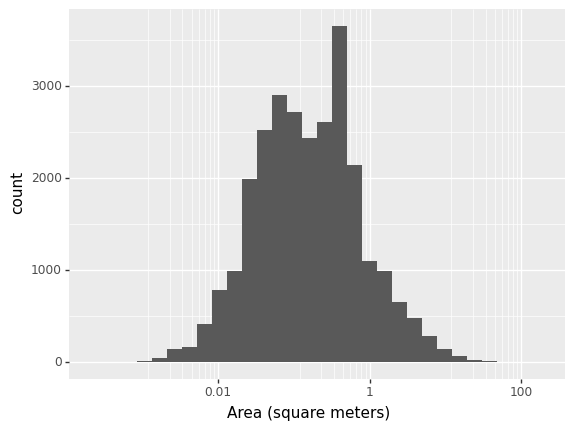

<ggplot: (8758853204484)>

In [21]:

(
 ggplot(artwork_size)
 + aes('Area') 
 + geom_histogram(bins=30)
 + scale_x_log10()
 + labs(x = 'Area (square meters)')
)

In [22]:
ratio_data = artwork_size[(artwork_size['Ratio']> 0.2) & (artwork_size['Ratio']< 5)]
ratio_data

Id Accession_number              Artist ArtistRole  ArtistId  \
0        1035           A00001       Blake, Robert     artist        38   
1        1036           A00002       Blake, Robert     artist        38   
2        1037           A00003       Blake, Robert     artist        38   
3        1038           A00004       Blake, Robert     artist        38   
4        1039           A00005      Blake, William     artist        39   
...       ...              ...                 ...        ...       ...   
69194  122958           T13863  P-Orridge, Genesis     artist     16646   
69195  122959           T13864  P-Orridge, Genesis     artist     16646   
69196  122960           T13865  P-Orridge, Genesis     artist     16646   
69197  122961           T13866  P-Orridge, Genesis     artist     16646   
69200  127035           T13869   Brunias, Agostino     artist      3824   

                                                   Title  \
0      A Figure Bowing before a Seated Old Man with h...   
1      Two Drawings of Frightened Figures, Probably f...   
2      The Preaching of Warning. Verso: An Old Man En...   
3         Six Drawings of Figures with Outstretched Arms   
4      The Circle of the Lustful: Francesca da Rimini...   
...                                                  ...   
69194                   Venus Mound (from Tampax Romana)   
69195   It’s That Time Of The Month (from Tampax Romana)   
69196                        Larvae (from Tampax Romana)   
69197                   Living Womb (from Tampax Romana)   
69200                   Dancing Scene in the West Indies   

                     DataText  \
0              date not known   
1              date not known   
2                     ?c.1785   
3              date not known   
4      1826–7, reprinted 1892   
...                       ...   
69194                    1976   
69195                    1975   
69196                    1975   
69197                    1976   
69200                 1764–96   

                                                  Medium  \
0      Watercolour, ink, chalk and graphite on paper....   
1                                      Graphite on paper   
2            Graphite on paper. Verso: graphite on paper   
3                                      Graphite on paper   
4                                Line engraving on paper   
...                                                  ...   
69194  Wood, Perspex, plaster, wire, tampons and huma...   
69195  Wood, Perspex, clock case, tampons and human b...   
69196   Perspex, Wood, hairpiece, tampon and human blood   
69197  Wood, Perspex, plastic, photograph on paper, t...   
69200                                Oil paint on canvas   

                                              CreditLine    Year  ...  Width  \
0                    Presented by Mrs John Richmond 1922     NaN  ...  394.0   
1                    Presented by Mrs John Richmond 1922     NaN  ...  311.0   
2                    Presented by Mrs John Richmond 1922  1785.0  ...  343.0   
3                    Presented by Mrs John Richmond 1922     NaN  ...  318.0   
4      Purchased with the assistance of a special gra...  1826.0  ...  243.0   
...                                                  ...     ...  ...    ...   
69194                 Transferred from Tate Archive 2012  1976.0  ...  305.0   
69195                 Transferred from Tate Archive 2012  1975.0  ...  305.0   
69196                 Transferred from Tate Archive 2012  1975.0  ...  305.0   
69197                 Transferred from Tate Archive 2012  1976.0  ...  305.0   
69200  Purchased with assistance from Tate Patrons an...  1764.0  ...  508.0   

      Height  Depth  Units  Inscription ThumbnailCopyright  \
0      419.0    NaN     mm          NaN                NaN   
1      213.0    NaN     mm          NaN                NaN   
2      467.0    NaN     mm          NaN                NaN   
3      394.0    NaN     mm          NaN                NaN   


## Ratio Plot with Plotnine

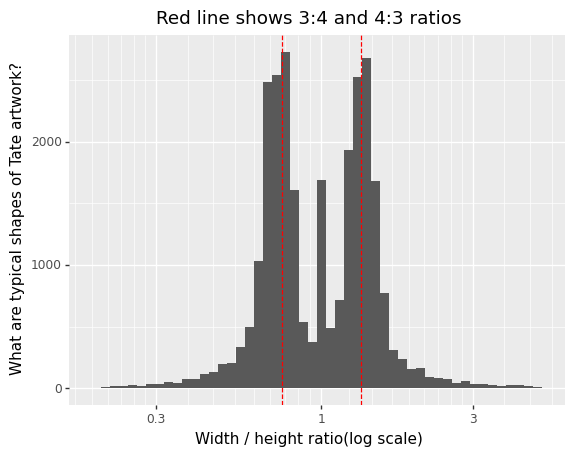

<ggplot: (8758853135062)>

In [23]:
(
 ggplot(ratio_data)
 + aes('Ratio') 
 + geom_histogram(bins=50)
 + scale_x_log10()
 + geom_vline(xintercept = [3 /4, 4/3],
              linetype='dashed', color='red')
 
 + labs(x = 'Width / height ratio(log scale)',
        y = "What are typical shapes of Tate artwork?",
        title = "Red line shows 3:4 and 4:3 ratios")
)

### Ratio plot with plotly 

In [24]:
ratio_plot = px.histogram(ratio_data, x='Ratio', nbins= 100, title= "Red line shows Golden Ratio")


# Add Vertical Line 
ratio_plot.add_vline(x = 1.61803398875, line_dash ="dash", line_color ='red')

# Layout setting
ratio_plot.update_layout(paper_bgcolor= '#FFFDE7' ,
                         title_font_family = "Times New Roman",
                         title_font_color = "Black",
                         title_font_size = 30
                         )
ratio_plot.update_xaxes(type='log',range=[-1,1] ,
                        tickfont_family = "Arial Black",
                        title_text = 'Width / height ratio(log scale)',
                        title_font = dict(family = "Times New Roman",
                                         size = 18 ,
                                         color = "crimson",))
ratio_plot.update_yaxes(tickfont_family = "Arial Black",
                        title_text = "What are typical shapes of Tate artwork?" ,
                        title_font = dict(family = "Times New Roman",
                                        size = 18,
                                        color = 'crimson' ))
ratio_plot.show()

### Exploring Artwork_size dataframe to get shape dataframe

In [25]:
ratio_data_two = artwork_size

# loc value and assign values to new column
ratio_data_two.loc[ratio_data_two['Ratio'] > 1.05, 'Shape']  = 'Landscape'
ratio_data_two.loc[ratio_data_two['Ratio'] < 0.95, 'Shape']  = 'Portrait'
ratio_data_two.loc[ ~  (ratio_data_two['Ratio'] >  1.05) & ~ (ratio_data_two['Ratio'] < 0.95), 'Shape'] = 'Square'

# groupby (shape, year) and create count column and assign values
shape_df  = ratio_data_two.groupby(['Shape', 'Year']).agg(Counts=('Shape', 'size'))
shape_df  = shape_df.reset_index()

# round year column and create decade column
shape_df['Decade'] = round(shape_df['Year'],-1)

shape_df = shape_df[shape_df['Decade']>=1700]


shape_df['Percentage'] =( shape_df['Counts'] / sum(shape_df['Counts']))   

shape_df = shape_df[['Decade', 'Percentage' ,'Shape']]
shape_df = shape_df.drop_duplicates(subset=['Decade','Shape'])

shape_df

Decade  Percentage      Shape
49   1700.0    0.000086  Landscape
54   1710.0    0.000043  Landscape
56   1720.0    0.000086  Landscape
59   1730.0    0.000043  Landscape
65   1740.0    0.000043  Landscape
..      ...         ...        ...
762  1970.0    0.002188     Square
771  1980.0    0.003560     Square
782  1990.0    0.000686     Square
791  2000.0    0.000558     Square
802  2010.0    0.000257     Square

[93 rows x 3 columns]

## Area plot with Plotly for shape_df

In [26]:
shape_area = px.area(shape_df, x = 'Decade',
                     y='Percentage',
                     color = 'Shape')

# Layout setting 
shape_area.update_layout(
                    showlegend=True,
                    paper_bgcolor='#FFFDE7',
                    title = '(Landscape / Portrait / Square) Over time',
                    title_font_family = 'Time New Roman',
                    title_font_color = 'Black',
                    title_font_size = 30
                )

# Update axes
shape_area.update_xaxes( title_text = 'Decade' , title_font=dict(size=18, 
                                                                  family='Times New Roman',
                                                                  color='crimson'))
shape_area.update_xaxes(tickfont_family="Arial Black")
shape_area.update_yaxes( title_text = 'Percentage' ,
                                                  title_font=dict(size=18,
                                                                  family='Times New Roman', 
                                                                  color='crimson'))
shape_area.update_yaxes(tickfont_family="Arial Black")

shape_area.show()

In [27]:
shape_df_two  = shape_df

shape_df_two = shape_df_two.pivot(index='Decade', columns='Shape', values='Percentage')
shape_df_two = shape_df_two.fillna(0).reset_index()
shape_df_two

Shape  Decade  Landscape  Portrait    Square
0      1700.0   0.000086  0.000086  0.000000
1      1710.0   0.000043  0.000172  0.000043
2      1720.0   0.000086  0.000043  0.000000
3      1730.0   0.000043  0.000086  0.000043
4      1740.0   0.000043  0.000386  0.000043
5      1750.0   0.000214  0.000214  0.000043
6      1760.0   0.000043  0.000086  0.000000
7      1770.0   0.000043  0.000343  0.000043
8      1780.0   0.000558  0.000601  0.000043
9      1790.0   0.000300  0.002917  0.000043
10     1800.0   0.000772  0.001416  0.000086
11     1810.0   0.000386  0.000944  0.000043
12     1820.0   0.000172  0.000643  0.000043
13     1830.0   0.000257  0.001201  0.000043
14     1840.0   0.000601  0.000815  0.000043
15     1850.0   0.000558  0.000515  0.000043
16     1860.0   0.000643  0.001845  0.000043
17     1870.0   0.000472  0.000515  0.000043
18     1880.0   0.000729  0.000472  0.000043
19     1890.0   0.000643  0.000515  0.000043
20     1900.0   0.000686  0.000515  0.000086
21     1910.0   0.001544  0.000987  0.000086
22     1920.0   0.001887  0.000987  0.000343
23     1930.0   0.001673  0.000815  0.000129
24     1940.0   0.001673  0.001759  0.000214
25     1950.0   0.000772  0.002359  0.000043
26     1960.0   0.003389  0.001845  0.000257
27     1970.0   0.006263  0.004075  0.002188
28     1980.0   0.007035  0.007464  0.003560
29     1990.0   0.005448  0.002788  0.000686
30     2000.0   0.009523  0.002831  0.000558
31     2010.0   0.001287  0.000944  0.000257

In [28]:
shape_area_two = go.Figure()


shape_area_two.add_trace(go.Scatter(
                        x = shape_df_two['Decade'], y = shape_df_two['Square'],
                        name = 'Square',
                        mode =  'lines',
                        line = dict(width=0.5, color='blue'),
                        stackgroup = 'one',
                        groupnorm= 'percent'
                        
    
    
))

shape_area_two.add_trace(go.Scatter(
                        x = shape_df_two['Decade'], y = shape_df_two['Portrait'],
                        name = 'Portrait',
                        mode =  'lines',
                        line = dict(width=0.5, color='green'),
                        stackgroup = 'one',
                       
                        
    
                        
))

shape_area_two.add_trace(go.Scatter(
                        x = shape_df_two['Decade'], y = shape_df_two['Landscape'],
                        name = 'Landscape',
                        mode =  'lines',
                        line = dict(width=0.5, color='crimson'),
                        stackgroup = 'one',
                       
                        
    
                        
))

# Layout setting 
shape_area_two.update_layout(
    showlegend=True,
    paper_bgcolor='#FFFDE7',
    plot_bgcolor='rgba(0,0,0,0)',
    title = '(Landscape / Portrait / Square) Over time',
    title_font_family = 'Time New Roman',
    title_font_color = 'Black',
    title_font_size = 30,
                )

# Update axes
shape_area_two.update_xaxes( title_text = 'Decade' , title_font=dict(size=18, 
                                                                  family='Times New Roman',
                                                                  color='crimson'))
shape_area_two.update_xaxes(tickfont_family="Arial Black")
shape_area_two.update_yaxes( title_text = 'Percentage' ,
                                                  title_font=dict(size=18,
                                                                  family='Times New Roman', 
                                                                  color='crimson'))
shape_area_two.update_yaxes(tickfont_family="Arial Black")





shape_area_two.show()


##  Exploring artwork dataframe to get  Size_by_decade dataframe for  plotting ratio line plot and  area plots with plotly

`summarize()` in R turns many rows into one.
Eg. summarize(total = n() , percent_yes = `mean(vote==1)`.The result will be one row dataframe.

`mean(vote == 1)` is a way of calculating "percent of vote equal to 1"


`group_by()` before `summarize()` turns groups into one row each . 

`groupby_by(decade = round(year, -1))%>%
 summarize(median_ratio = median(ratio),
           median_area = median(area),
           n = n()) %>%>`  **in R is same as**
           
`df['Decade'] = round(df['Year'], -1)
df = df.groupby(['Decade']).agg(median_ratio=(('Ratio', np.median), median_area =('Area', np.median), n = ('Counts' ,'size'))` **in python**        

In [29]:
size_by_decade = artwork_size
size_by_decade = size_by_decade.groupby(['Year','Ratio', 'Area']).agg(Counts=('Year', 'size'))
size_by_decade = size_by_decade.reset_index()
size_by_decade['Decade'] = round(size_by_decade['Year'], -1)
size_by_decade = size_by_decade[['Decade', 'Ratio', 'Area', 'Counts']]
size_by_decade = size_by_decade.groupby(['Decade']).agg(median_ratio = ('Ratio', np.median), median_area = ('Area', np.median), n = ('Counts', 'size'))
size_by_decade = size_by_decade.reset_index()
size_by_decade = size_by_decade[size_by_decade['Decade'] >= 1700]

size_by_decade

Decade  median_ratio  median_area     n
15  1700.0      1.200939     0.482411    10
16  1710.0      0.877159     0.238097     7
17  1720.0      0.808754     0.478478    18
18  1730.0      0.977590     0.888500    26
19  1740.0      0.831497     0.485367    57
20  1750.0      0.800128     0.301526    78
21  1760.0      0.804147     0.271515    88
22  1770.0      0.797924     0.202532   112
23  1780.0      0.762097     0.130435   258
24  1790.0      0.761755     0.100700   177
25  1800.0      0.772242     0.051504   379
26  1810.0      0.720690     0.046550   215
27  1820.0      0.725564     0.048504   341
28  1830.0      0.752815     0.082592   312
29  1840.0      0.757339     0.118011   267
30  1850.0      0.790763     0.111265   166
31  1860.0      0.954654     0.069845   377
32  1870.0      0.958354     0.147883   148
33  1880.0      1.160000     0.351780   251
34  1890.0      0.950906     0.302163   248
35  1900.0      1.140625     0.206248   375
36  1910.0      1.140173     0.226768   566
37  1920.0      1.200000     0.161915   748
38  1930.0      1.110787     0.159576   619
39  1940.0      0.868513     0.208744   810
40  1950.0      1.074118     0.199183   808
41  1960.0      1.028027     0.353565  1745
42  1970.0      1.000000     0.297528  3657
43  1980.0      1.000000     0.294000  2711
44  1990.0      1.143577     0.446082  1277
45  2000.0      1.000000     0.346750  1265
46  2010.0      1.000000     0.491666   302

In [30]:
ratio_line = go.Figure()

# Function to change marker size based on values
def set_size(x):
    if x <= 1000:
        return 10
    elif (x>1000) and (x<=2000):
         return 20
    elif (x>2000) and (x<=3000):
         return 30
    else:
        return  40
    
# Function to change marker color based on values
def set_color(x):
    if x <= 1000:
        return 'MediumPurple'
    elif (x>1000) and (x<=2000):
         return '#51DDC9'
    elif (x>2000) and (x<=3000):
         return '#CE9FE5'
    else:
        return  "#CAF0BF"
      
# here is how to use above function --> size = list(map(set_size,size_by_decade['n']))
# If we want to add text to point ,add text to mode parameter. We can change the position of text by adding textposition='top center' 
ratio_line.add_trace(go.Scatter(x=size_by_decade['Decade'],
                                 y=size_by_decade['median_ratio'],                          
                                 text = size_by_decade['n'], 
                                 mode='lines+markers+text',
                                 textposition = 'top center',
                                marker=dict(
                                color= 'black',
                                size = list(map(set_size,size_by_decade['n'])),
                                line=dict(
                                color= size_by_decade['n'],
                                width=2
                                 ))))

# Layout setting 
ratio_line.update_layout(
    showlegend=False,
    paper_bgcolor='#FFFDE7',
    title = 'Mediam Ratio over Time',
    title_font_family = 'Time New Roman',
    title_font_color = 'Black',
    title_font_size = 30,
                )

# Update axes
ratio_line.update_xaxes( title_text = 'Decade' , title_font=dict(size=18, 
                                                                  family='Times New Roman',
                                                                  color='crimson'))
ratio_line.update_xaxes(tickfont_family="Arial Black")
ratio_line.update_yaxes( title_text = 'Median ratio (Width/Height)' ,
                                                  title_font=dict(size=18,
                                                                  family='Times New Roman', 
                                                                  color='crimson'))
ratio_line.update_yaxes(tickfont_family="Arial Black")




ratio_line.show()

In [43]:
area_line  =  go.Figure()


area_line.add_trace(go.Scatter(x=size_by_decade['Decade'],
                               y=size_by_decade['median_area'],
                               text = size_by_decade['n'],
                               mode='lines+markers+text',
                               textposition = 'top center',
                               marker=dict(
                               color='black',
                               size =list(map(set_size, size_by_decade['n'])),
                               line=dict(
                               color=size_by_decade['n'],
                               width=2
                             ))))
# Layout setting 
area_line.update_layout(
    showlegend=False,
    paper_bgcolor='#FFFDE7', 
    title = 'Mediam Area over Time',
    title_font_family = 'Time New Roman',
    title_font_color = 'Black',
    title_font_size = 30,
                )

# Update axes
area_line.update_xaxes( title_text = 'Decade' , title_font=dict(size=18, 
                                                                  family='Time New Roman',
                                                                  color='crimson'))
area_line.update_xaxes(tickfont_family="Arial Black")
area_line.update_yaxes( title_text = 'Median area in meters^2' ,
                                                  title_font=dict(size=18,
                                                                  family='Time New Roman', 
                                                                  color='crimson'))
area_line.update_yaxes(tickfont_family="Arial Black")





area_line.show()

## Exploring artwork_size dataframe to get new dataframe for boxplot

In [32]:
box_df = artwork_size

box_df['Decade'] = round(box_df['Year'], -1)
box_df =  box_df[box_df['Decade'] >= 1700]
box_df = box_df.groupby(['Decade', 'Area']).agg(Counts=('Decade', 'size'))
box_df = box_df.reset_index()

box_df

Decade       Area  Counts
0      1700.0   0.193545       1
1      1700.0   0.271656       1
2      1700.0   0.475615       1
3      1700.0   0.477540       1
4      1700.0   0.480952       1
...       ...        ...     ...
17292  2010.0  12.600000       1
17293  2010.0  20.300000       1
17294  2010.0  21.163920       1
17295  2010.0  24.624000       1
17296  2010.0  36.636800       1

[17297 rows x 3 columns]

In [33]:
fig = px.box(box_df, x= 'Decade', y= 'Area',
             log_y=True ,color='Decade')

# Layout setting 
fig.update_layout(
    showlegend=True,
    paper_bgcolor='#FFFDE7',
    title = 'Area over Time',
    title_font_family = 'Time New Roman',
    title_font_color = 'Black',
    title_font_size = 30,
                )

# Update axes
fig.update_xaxes( title_text = 'Decade' , title_font=dict(size=18, 
                                                                  family='Times New Roman',
                                                                  color='crimson'))
fig.update_xaxes(tickfont_family="Arial Black")
fig.update_yaxes( title_text = 'Area' ,
                                                  title_font=dict(size=18,
                                                                  family='Times New Roman', 
                                                                  color='crimson'))
fig.update_yaxes(tickfont_family="Arial Black")



fig.show()

# Data Exploratory Analysis for Artists and Size

In [34]:
artist_size_exploration = artwork_size


artist_size_exploration = artist_size_exploration.groupby(['Artist']).agg(n_pieces=('Artist', 'size'),
                                                        avg_year = ('Year', np.mean),
                                                        first_year = ('Year', np.min),
                                                        last_year = ('Year', np.max),
                                                        median_area = ('Area', np.median ),
                                                        median_ratio = ('Ratio', np.median))
artist_size_exploration = artist_size_exploration.reset_index()
artist_size_exploration  = artist_size_exploration.sort_values('n_pieces', ascending=False)
artist_size_exploration = artist_size_exploration.dropna(subset=['avg_year','first_year', 'last_year'])

artist_size_exploration

Artist  n_pieces     avg_year  first_year  last_year  \
1997      Moore, Henry, OM, CH       619  1971.122779      1925.0     1984.0   
700           Daniell, William       612  1814.186275      1814.0     1825.0   
223              Beuys, Joseph       556  1978.437743      1945.0     2009.0   
346         British (?) School       387  1806.460317      1637.0     1833.0   
2178     Paolozzi, Sir Eduardo       385  1967.587013      1946.0     1993.0   
...                        ...       ...          ...         ...        ...   
1433           Jackson, Arthur         1  1937.000000      1937.0     1937.0   
1432  Jackson, Alexander Young         1  1919.000000      1919.0     1919.0   
1430             Jack, Richard         1  1912.000000      1912.0     1912.0   
1429             Jaar, Alfredo         1  2002.000000      2002.0     2002.0   
1563   Knight, Charles Parsons         1  1893.000000      1893.0     1893.0   

      median_area  median_ratio  
1997     0.064860      0.914286  
700      0.055254      0.711509  
223      0.312839      1.408784  
346      0.016779      0.731429  
2178     0.096900      1.427403  
...           ...           ...  
1433     0.090424      0.713483  
1432     0.522288      0.803970  
1430     3.261360      0.712150  
1429    10.416000      1.693548  
1563     0.687310      0.562896  

[2937 rows x 7 columns]

 ### Exploring artwork_size dataframe to get artist_size dataframe for plotting aspect ratio box plot & aspect ratio ridge line chart.

In [35]:
artist_size = artwork_size

artist_size = artist_size.groupby(['Artist', 'Ratio']).agg(Counts=('Artist', 'size'))
artist_size = artist_size.sort_values('Counts', ascending=False).reset_index()

# TO check top 16 artist according to Ratio
# artist_size = artist_size.groupby([ 'Artist']).sum()
# artist_size = artist_size.sort_values('Counts', ascending=False).reset_index()
# artist_size = artist_size.head(25)


artist_size.loc[~artist_size['Artist'].isin(['Moore, Henry, OM, CH', 'Daniell, William', 'Beuys, Joseph',
       'British (?) School', 'Paolozzi, Sir Eduardo', 'Flaxman, John',
       'Phillips, Esq Tom', 'Warhol, Andy', 'Constable, John',
       'Cozens, Alexander', 'Stothard, Thomas', 'Ferrari, León',
       'Blake, William', 'Piper, John', 'Dance-Holland, Sir Nathaniel',
       'Kitaj, R.B.', 'Hamilton Finlay, Ian', 'Gainsborough, Thomas',
       'Flanagan, Barry', 'Schütte, Thomas', 'Tilson, Joe',
       'Burne-Jones, Sir Edward Coley, Bt', 'Nolan, Sir Sidney',
       'Pasmore, Victor', 'Hamilton, Richard']), 'Artist'] = "Other"
artist_size = artist_size.loc[artist_size['Artist'] != "Other"]
artist_size = artist_size.sort_values(['Artist','Ratio'], ascending=False)


# To create n column
n = artist_size.groupby(['Artist']).sum().reset_index()
n = n.sort_values(['Artist','Ratio'], ascending=False)
n = n[['Artist', 'Counts']]
n = n.rename(columns=({'Counts':'n'}))

# Merge dataframes and string manipulation
artist_aspect_ratio = artist_size.merge(n, left_on='Artist', right_on="Artist")
artist_aspect_ratio['Artists_&_number_of_pieces'] = artist_aspect_ratio['Artist'] + " " + "(" + artist_aspect_ratio['n'].astype(str) + ")"
artist_aspect_ratio = artist_aspect_ratio.sort_values(['Artist'], ascending=True)

#artist_aspect_ratio = artist_aspect_ratio[[ 'Artists_&_number_of_pieces', 'Ratio', 'Counts']]
artist_aspect_ratio

Artist     Ratio  Counts    n Artists_&_number_of_pieces
4158  Beuys, Joseph  0.128571       1  556        Beuys, Joseph (556)
3814  Beuys, Joseph  1.430088       1  556        Beuys, Joseph (556)
3815  Beuys, Joseph  1.429952       1  556        Beuys, Joseph (556)
3816  Beuys, Joseph  1.429889       1  556        Beuys, Joseph (556)
3817  Beuys, Joseph  1.429594       1  556        Beuys, Joseph (556)
...             ...       ...     ...  ...                        ...
132    Warhol, Andy  1.232628       1  258         Warhol, Andy (258)
131    Warhol, Andy  1.232877       1  258         Warhol, Andy (258)
130    Warhol, Andy  1.233256       1  258         Warhol, Andy (258)
140    Warhol, Andy  1.211594       1  258         Warhol, Andy (258)
0      Warhol, Andy  3.063492       1  258         Warhol, Andy (258)

[4159 rows x 5 columns]

In [36]:
artist_box = px.box(artist_aspect_ratio, x = 'Ratio', y = 'Artists_&_number_of_pieces',
           color = 'Artists_&_number_of_pieces'  )

# Layout setting (legend True/False is optional)
artist_box.update_layout(showlegend = False,
                         paper_bgcolor = '#FFFDE7',
                         title = 'What aspect ratio do artists work in?',
                         title_font_family = 'Time New Roman',
                         title_font_color = 'Black',
                         title_font_size = 30)


# Layout settin 2
artist_box.update_layout(autosize=True,
                         width=1000,
                         height= 700,
                         )


# Update axes
artist_box.update_xaxes( title_text = 'Ratio(width/height)' , title_font =dict(size = 20, 
                                                                  family = 'Times New Roman',
                                                                  color ='crimson'))
artist_box.update_xaxes(tickfont_family = "Arial Black")
artist_box.update_yaxes( title_text = 'Artist' ,
                                                  title_font=dict(size = 20,
                                                                  family = 'Times New Roman', 
                                                                  color = 'crimson'))
artist_box.update_yaxes(tickfont_family = "Arial Black")


artist_box.update_xaxes(range=[-0.25,3])
artist_box.add_vline(x=3/4, line_width=1, line_dash="dash", line_color="black")
artist_box.add_vline(x=4/3, line_width=1, line_dash="dash", line_color="black")

artist_box.show()

 ### Joyplot/ Ridgeline plot with Joypy for aspect ratios of artists
 

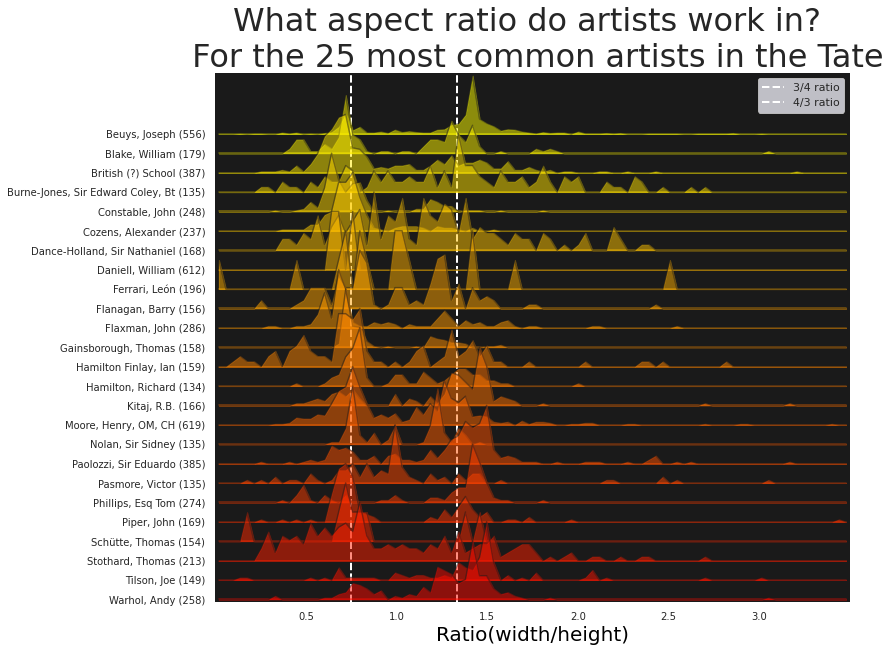

In [37]:
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(dpi=380)
%matplotlib inline
 
    
# optional styles (range_style='own', grid='y', linewidth=1)
# notable parameter - x_range   

fig, axes = joypy.joyplot(artist_aspect_ratio, by = 'Artists_&_number_of_pieces', column='Ratio',
                          x_range = [0,3.5],kind = 'counts', bins = 90,
                          background = 'k', ylim = 'own', figsize=(12,8),
                          legend= False, colormap=cm.autumn_r, alpha=0.5 ,)

# Decoration
plt.title('What aspect ratio do artists work in? \n For the 25 most common artists in the Tate', fontsize=32)
plt.rc('font', size=20)
plt.xlabel('Ratio(width/height)',  fontsize=20, color='black')


# Adding vertical lines 
xpoints = [3/4,4/3]
colors = ['w','w']
label = ['3/4 ratio' ,'4/3 ratio']
for p,c,l in  zip(xpoints, colors,label):
    plt.axvline(p,linestyle='--', linewidth=2, c=c, label = l)
    
plt.legend()
plt.show();


 ### Exploring artwork_size dataframe to get medium_size dataframe for plotting aspect ratio box plot & aspect ratio ridge line chart.

In [38]:
medium_size = artwork_size

medium_size = medium_size.groupby(['Medium', 'Ratio']).agg(Counts=('Medium', 'size'))
medium_size = medium_size.sort_values('Counts', ascending=False).reset_index()

# TO check top 16 artist according to Ratio
# medium_size = medium_size.groupby([ 'Medium']).sum()
# medium_size = medium_size.sort_values('Counts', ascending=False).reset_index()
# medium_size = medium_size.head(25)
# medium_size['Medium'].values


medium_size.loc[~medium_size['Medium'].isin(['Oil paint on canvas', 'Screenprint on paper',
       'Lithograph on paper', 'Etching on paper', 'Graphite on paper',
       'Photograph, gelatin silver print on paper',
       'Intaglio print on paper', 'Graphite and watercolour on paper',
       'Watercolour on paper', 'Ink on paper', 'Print on paper',
       'Aquatint on paper', 'Etching and aquatint on paper', 'Bronze',
       'Copper plate', 'Wood engraving on paper',
       'Ink and watercolour on paper', 'Digital print on paper',
       'Graphite, ink and watercolour on paper', 'Oil paint on wood',
       'Chalk on paper', 'Oil paint on board',
       'Graphite and ink on paper', 'Mezzotint on paper',
       'Woodcut on paper']), 'Medium'] = "Other"
medium_size = medium_size.loc[medium_size['Medium'] != "Other"]
medium_size = medium_size.sort_values(['Medium','Ratio'], ascending=False)



# To create n column
n = medium_size.groupby(['Medium']).sum().reset_index()
n = n.sort_values(['Medium','Ratio'], ascending=False)
n = n[['Medium', 'Counts']]
n = n.rename(columns=({'Counts':'n'}))

# Merge dataframes and string manipulation
medium_aspect_ratio = medium_size.merge(n, left_on='Medium', right_on="Medium")
medium_aspect_ratio['Medium_&_number_of_pieces'] = medium_aspect_ratio['Medium'] + " " + "(" + medium_aspect_ratio['n'].astype(str) + ")"
medium_aspect_ratio = medium_aspect_ratio.sort_values(['Medium'], ascending=True)
medium_aspect_ratio

Medium     Ratio  Counts    n Medium_&_number_of_pieces
13216  Aquatint on paper  0.323009       1  409   Aquatint on paper (409)
13158  Aquatint on paper  1.020408       1  409   Aquatint on paper (409)
13159  Aquatint on paper  1.015982       1  409   Aquatint on paper (409)
13160  Aquatint on paper  1.014679       1  409   Aquatint on paper (409)
13161  Aquatint on paper  1.000000       6  409   Aquatint on paper (409)
...                  ...       ...     ...  ...                       ...
62      Woodcut on paper  0.793103       2  159    Woodcut on paper (159)
63      Woodcut on paper  0.783251       1  159    Woodcut on paper (159)
64      Woodcut on paper  0.782609       1  159    Woodcut on paper (159)
67      Woodcut on paper  0.775824       1  159    Woodcut on paper (159)
0       Woodcut on paper  2.897638       1  159    Woodcut on paper (159)

[13217 rows x 5 columns]

In [39]:
medium_box = px.box(medium_aspect_ratio, x = 'Ratio', y = 'Medium_&_number_of_pieces',
           color = 'Medium_&_number_of_pieces'  )

# Layout setting (legend True/False is optional)
medium_box.update_layout(showlegend = False,
                         paper_bgcolor = '#FFFDE7',
                         title = 'What aspect ratio is a medium typically in?',
                         title_font_family = 'Time New Roman',
                         title_font_color = 'Black',
                         title_font_size = 30)


# Layout settin 2
medium_box.update_layout(autosize=True,
                         width=1000,
                         height= 700,
                         )


# Update axes
medium_box.update_xaxes( title_text = 'Ratio(width/height)' , title_font =dict(size = 20, 
                                                                  family = 'Times New Roman',
                                                                  color ='crimson'))
medium_box.update_xaxes(tickfont_family = "Arial Black")
medium_box.update_yaxes( title_text = 'Medium' ,
                                                  title_font=dict(size = 20,
                                                                  family = 'Times New Roman', 
                                                                  color = 'crimson'))
medium_box.update_yaxes(tickfont_family = "Arial Black")


medium_box.update_xaxes(range=[-0.25,3])
medium_box.add_vline(x=3/4, line_width=1, line_dash="dash", line_color="black")
medium_box.add_vline(x=4/3, line_width=1, line_dash="dash", line_color="black")

medium_box.show()

 ### Joyplot/ Ridgeline plot with Joypy for aspect ratios of medium.

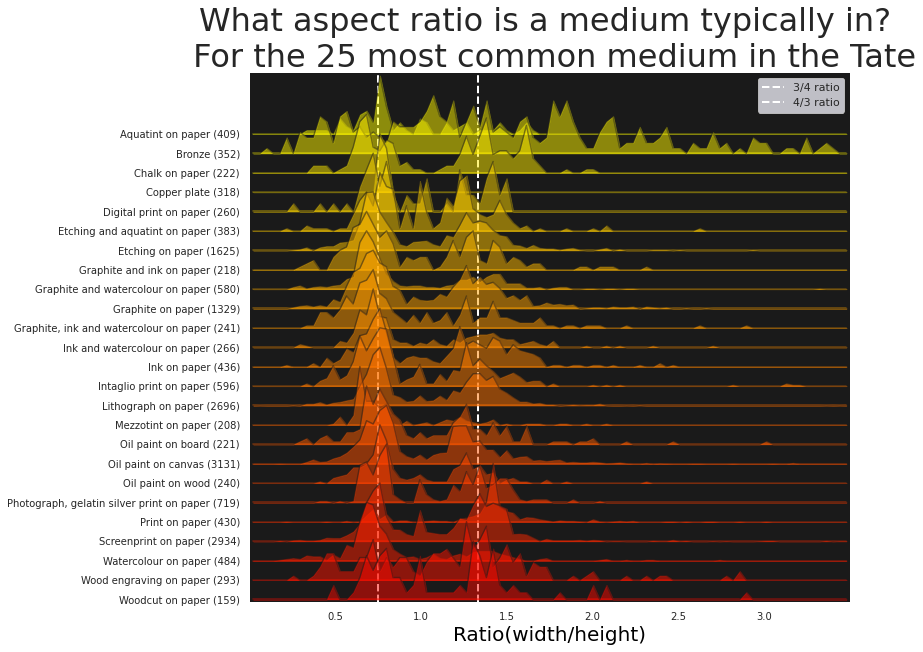

In [40]:
import joypy
import matplotlib.pyplot as plt
from matplotlib import cm

plt.figure(dpi=380)
%matplotlib inline
 
    
# optional styles (range_style='own', grid='y', linewidth=1)
# notable parameter - x_range   

fig, axes = joypy.joyplot(medium_aspect_ratio, by = 'Medium_&_number_of_pieces', column='Ratio',
                          x_range = [0,3.5],kind = 'counts', bins = 90,
                          background = 'k', ylim = 'own', figsize=(12,8),
                          legend= False, colormap=cm.autumn_r, alpha=0.5 ,)

# Decoration
plt.title('What aspect ratio is a medium typically in? \n For the 25 most common medium in the Tate', fontsize=32)
plt.rc('font', size=20)
plt.xlabel('Ratio(width/height)',  fontsize=20, color='black')


# Adding vertical lines 
xpoints = [3/4,4/3]
colors = ['w','w']
label = ['3/4 ratio' ,'4/3 ratio']
for p,c,l in  zip(xpoints, colors,label):
    plt.axvline(p,linestyle='--', linewidth=2, c=c, label = l)
    
plt.legend()
plt.show();

In [41]:
artist = artist.rename(columns={'id':'Id', 'name':'Name', 'gender':'Gender', 'dates':'Dates', 'yearOfBirth':'YearOfBirth', 'yearOfDeath':'YearOfDeath',
       'placeOfBirth':'PlaceOfBirth', 'placeOfDeath':'PlaceOfDeath', 'url':'Url'})

In [42]:
artist.head(10)

Id                    Name  Gender      Dates  YearOfBirth  YearOfDeath  \
0  10093  Abakanowicz, Magdalena  Female  born 1930       1930.0          NaN   
1      0     Abbey, Edwin Austin    Male  1852–1911       1852.0       1911.0   
2   2756        Abbott, Berenice  Female  1898–1991       1898.0       1991.0   
3      1  Abbott, Lemuel Francis    Male  1760–1803       1760.0       1803.0   
4    622          Abrahams, Ivor    Male  born 1935       1935.0          NaN   
5   2606                 Absalon    Male  1964–1993       1964.0       1993.0   
6   9550             Abts, Tomma  Female  born 1967       1967.0          NaN   
7    623           Acconci, Vito    Male  born 1940       1940.0          NaN   
8    624          Ackling, Roger    Male  1947–2014       1947.0       2014.0   
9    625         Ackroyd, Norman    Male  born 1938       1938.0          NaN   

                     PlaceOfBirth            PlaceOfDeath  \
0                          Polska                     NaN   
1     Philadelphia, United States  London, United Kingdom   
2      Springfield, United States   Monson, United States   
3  Leicestershire, United Kingdom  London, United Kingdom   
4           Wigan, United Kingdom                     NaN   
5         Tel Aviv-Yafo, Yisra'el           Paris, France   
6               Kiel, Deutschland                     NaN   
7         New York, United States                     NaN   
8       Isleworth, United Kingdom                     NaN   
9           Leeds, United Kingdom                     NaN   

                                                 Url  
0  http://www.tate.org.uk/art/artists/magdalena-a...  
1  http://www.tate.org.uk/art/artists/edwin-austi...  
2  http://www.tate.org.uk/art/artists/berenice-ab...  
3  http://www.tate.org.uk/art/artists/lemuel-fran...  
4  http://www.tate.org.uk/art/artists/ivor-abraha...  
5    http://www.tate.org.uk/art/artists/absalon-2606  
6  http://www.tate.org.uk/art/artists/tomma-abts-...  
7  http://www.tate.org.uk/art/artists/vito-acconc...  
8  http://www.tate.org.uk/art/artists/roger-ackli...  
9  http://www.tate.org.uk/art/artists/norman-ackr...

## Resources for this project

https://pandas.pydata.org/docs/user_guide/reshaping.html

https://plotly.com/python/filled-area-plots/

https://pbpython.com/sidetable.html

http://research.kraeutli.com/index.php/2013/11/the-tate-collection-on-github/

https://plotnine.readthedocs.io/en/stable/api.html

https://realpython.com/ggplot-python/

https://datatofish.com/if-condition-in-pandas-dataframe/

https://plotly.com/python/filled-area-plots/

https://seaborn.pydata.org/generated/seaborn.lineplot.html

https://www.gormanalysis.com/blog/python-pandas-for-your-grandpa-3-9-dataframe-groupby/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.agg.html

https://community.plotly.com/t/change-marker-colors-based-on-values-python/27722

https://plotly.com/python/text-and-annotations/

https://sylwiamielnicka.com/blog/advanced-plotly-sliders-and-dropdown-menus/

https://stackoverflow.com/questions/19377969/combine-two-columns-of-text-in-pandas-dataframe

https://plotly.com/python/box-plots/

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html

http://sigmaquality.pl/data-plots/perfect-plots-joyplot-plot/

https://fcpython.com/visualisation/joyplots-python-joypy

https://sbebo.github.io/posts/2017/08/01/joypy/